In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt

from nilearn import plotting
from os.path import join
from glob import glob
from matplotlib.colors import LinearSegmentedColormap

sns.set_context('talk')

In [2]:
def grab_corr(subjects, nodes, task, condition, session, atlas):
    errors = pd.Series(index=subjects, dtype=str)
    edges = pd.Series(index=subjects, name='edge', dtype=np.float64)
    node1 = nodes[0]
    node2 = nodes[1]
    
    for subject in subjects:
        try:
            if condition != None:
                corrmat = np.genfromtxt(join(data_dir, 
                                             'output/corrmats', 
                                             '{0}-session-{1}_{2}-{3}_{4}-corrmat.csv'.format(subject, 
                                                                                                        session, 
                                                                                                        task, 
                                                                                                        condition, 
                                                                                                        atlas)),
                                        delimiter=' ')
            else:
                corrmat = np.genfromtxt(join(data_dir, 
                                             'output/corrmats', 
                                             '{0}-session-{1}-{2}_network_corrmat_{3}.csv'.format(subject, 
                                                                                                        session, 
                                                                                                        task, 
                                                                                                        atlas)),
                                        delimiter=',')
            edges[subject] = corrmat[node1][node2]
            #post_retr_conn.at[subject] = np.ravel(corrmat, order='F')
        except Exception as e:
            errors[subject] = e
    return edges, errors


In [3]:
fig_dir = '/Users/kbottenh/Dropbox/Projects/physics-retrieval/figures'
data_dir = '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/'
roi_dir = '/Users/kbottenh/Dropbox/Data/templates/shen2015/'

masks = {'shen2015': '/Users/kbottenh/Dropbox/Projects/physics-retrieval/shen2015_2mm_268_parcellation.nii.gz', 
         'craddock2012': '/Users/kbottenh/Dropbox/Projects/physics-retrieval/craddock2012_tcorr05_2level_270_2mm.nii.gz'}

In [4]:
bx_dir = '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/rescored'
b_df = pd.read_csv(join(data_dir, 
                        'rescored', 
                        'physics_learning-local_efficiency-BayesianImpute.csv'), 
                   index_col=0, header=0)
drop = b_df.filter(regex='.*lEff.*').columns
b_df.drop(drop, axis=1, inplace=True)

In [12]:
subgraphs = glob(join(data_dir, 'output', 'craddock*sig_edges.csv'))

In [13]:
subgraphs

['/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-FSIQ2_Mod-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-FSIQ2_iqXSexXClass-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-FSIQ2_SexXClass-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-FSIQ2_F-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-FSIQ2_iqXClass-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-deltaPRI_F-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-fci_phys-deltaPRI_iqXSexXClass-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/craddock2012-retr_phys-WMI2_fd-sig_edges.csv',
 '/Users/kbottenh/Dropbox/Projects/physics-retrieval/data/output/c

In [14]:
b_df.head()

,Age,Strt.Level,RetrPhyAcc1,RetrPhyAcc2,FCIPhyAcc1,FCIPhyAcc2,VCI1,PRI1,WMI1,PSI1,...,PRI2XClass,deltaPRIXSexXClass,PRI2XSexXClass,deltaFSIQ,deltaFSIQXSex,FSIQ2XSex,deltaFSIQXClass,FSIQ2XClass,deltaFSIQXSexXClass,FSIQ2XSexXClass
101,20.471233,30.0,0.708333,0.750000,0.333333,0.444444,102.0,81.0,100.0,100.0,...,0.0,0.0,0.0,5.000000,5.0,99.0,0.0,0.0,0.0,0.0
102,21.202740,30.0,0.541667,0.833333,0.222222,0.555556,118.0,92.0,117.0,86.0,...,100.0,0.0,0.0,10.000000,0.0,0.0,10.0,114.0,0.0,0.0
103,18.887671,30.0,0.750000,0.875000,0.444444,0.777778,130.0,92.0,89.0,74.0,...,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0
104,21.342466,40.0,0.666667,0.708333,0.444444,0.555556,100.0,119.0,105.0,79.0,...,123.0,4.0,123.0,5.000000,5.0,108.0,5.0,108.0,5.0,108.0
105,20.802740,20.0,0.704523,0.793324,0.509359,0.654661,116.0,119.0,117.0,74.0,...,0.0,-0.0,0.0,1.295394,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
iqs = ['VCI', 'WMI', 'PSI', 'PRI', 'FSIQ']
for iq in iqs:
    b_df['delta{0}'.format(iq)] = b_df['{0}2'.format(iq)] - b_df['{0}1'.format(iq)]
    b_df['delta{0}XSex'.format(iq)] = b_df['delta{0}'.format(iq)] * b_df['F']
    b_df['{0}2XSex'.format(iq)] = b_df['{0}2'.format(iq)] * b_df['F']
    b_df['delta{0}XClass'.format(iq)] = b_df['delta{0}'.format(iq)] * b_df['Mod']
    b_df['{0}2XClass'.format(iq)] = b_df['{0}2'.format(iq)] * b_df['Mod']
    b_df['SexXClass'] = b_df['F'] * b_df['Mod']
    b_df['delta{0}XSexXClass'.format(iq)] = b_df['delta{0}'.format(iq)] * b_df['SexXClass']
    b_df['{0}2XSexXClass'.format(iq)] = b_df['{0}2'.format(iq)] * b_df['SexXClass']

In [16]:
husl_pal = sns.husl_palette(h=0, n_colors=268)
crayons_l = sns.crayon_palette(['Vivid Tangerine', 'Cornflower'])
crayons_d = sns.crayon_palette(['Brick Red', 'Midnight Blue'])
grays = sns.light_palette('#999999', n_colors=3, reverse=True)

f_2 = sns.crayon_palette(['Red Orange', 'Vivid Tangerine'])
m_2 = sns.crayon_palette(['Cerulean', 'Cornflower'])

craddock2012-fci_phys-FSIQ2_Mod-sig_edges
FSIQ2
craddock2012-fci_phys-FSIQ2_Mod-sig_edges (234, 52)
craddock2012-fci_phys-FSIQ2_Mod-sig_edges (52, 234)
craddock2012-fci_phys-FSIQ2_iqXSexXClass-sig_edges
FSIQ2
craddock2012-fci_phys-FSIQ2_iqXSexXClass-sig_edges (234, 52)
SexXClass interaction: craddock2012-fci_phys-FSIQ2_iqXSexXClass-sig_edges
craddock2012-fci_phys-FSIQ2_iqXSexXClass-sig_edges (52, 234)
craddock2012-fci_phys-FSIQ2_SexXClass-sig_edges
FSIQ2
craddock2012-fci_phys-FSIQ2_SexXClass-sig_edges (18, 199)
craddock2012-fci_phys-FSIQ2_SexXClass-sig_edges (199, 18)
craddock2012-fci_phys-FSIQ2_SexXClass-sig_edges (234, 52)
craddock2012-fci_phys-FSIQ2_SexXClass-sig_edges (52, 234)
craddock2012-fci_phys-FSIQ2_F-sig_edges
FSIQ2
craddock2012-fci_phys-FSIQ2_F-sig_edges (18, 199)
craddock2012-fci_phys-FSIQ2_F-sig_edges (199, 18)
craddock2012-fci_phys-FSIQ2_iqXClass-sig_edges
FSIQ2
craddock2012-fci_phys-FSIQ2_iqXClass-sig_edges (234, 52)
Class interaction: craddock2012-fci_phys-FSIQ2_iqXCla

<Figure size 432x288 with 0 Axes>

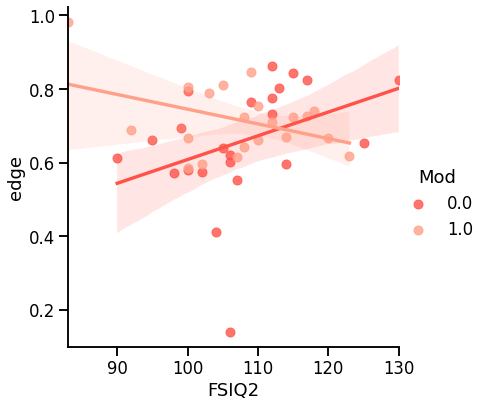

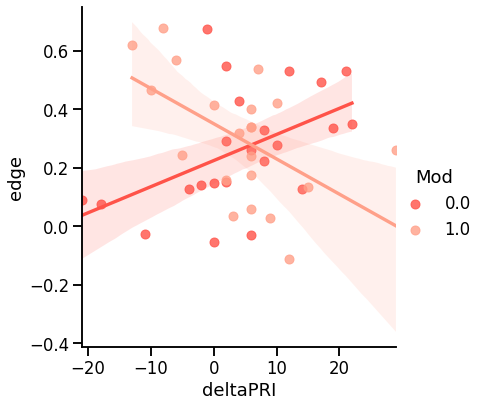

In [17]:
node_size = 15
plt.tight_layout(pad=1.5)
for subgraph in subgraphs:
    regression = subgraph[63:-4]
    print(regression)
    keys = regression.split('-')
    mask = keys[0]
    condition = 'Physics'
    task = keys[1].split('_')[0]
    iq = keys[2].split('_')[0]
    cov = keys[2].split('_')[1]
    print(iq)
    
    coordinates = plotting.find_parcellation_cut_coords(labels_img=masks[mask])
    
    conns = pd.read_csv(subgraph, index_col=0, header=0)
    for i in conns.index:
        conns.at[i, 'x'] = coordinates[i-1][0]
        conns.at[i, 'y'] = coordinates[i-1][1]
        conns.at[i, 'z'] = coordinates[i-1][2]
    conns.set_index([conns.index, 'x', 'y', 'z'], inplace=True)
    q = plotting.plot_connectome(conns, coordinates, node_size=node_size, 
                                 edge_threshold=2., edge_vmax=7., edge_cmap='PuOr_r', )
    q.savefig(
        join(fig_dir, '{0}.png'.format(regression)), dpi=300)
    q.close()
    conns.dropna(how='all', axis=0, inplace=True)
    conns.dropna(how='all', axis=1, inplace=True)
    conns.fillna(0, inplace=True)
    conns.sort_index(axis=0, ascending=True, inplace=True)
    conns.sort_index(axis=1, ascending=True, inplace=True)
    conns.index.rename(['idx', 'x', 'y', 'z'], inplace=True)
    nodes = list(conns.index.get_level_values('idx').astype(str))
    hmap_mask = np.triu(np.ones_like(conns.values, dtype=np.bool))
    
    if conns.max().max() > 0:
        cmap = 'Oranges'
        one = conns.idxmax(axis=0)
        two = conns.idxmax(axis=1)
    else:
        cmap = 'Purples_r'
        one = conns.idxmin(axis=0)
        two = conns.idxmin(axis=1)
    edges = []
    for column in conns.columns:
        ind = conns[conns[column] != 0].index
        for i in ind:
            #print(column, i[0])
            edges.append((int(column), i[0]))

    for edge in edges:
        print(regression, edge)
        sns.axes_style('ticks')
        edges, error = grab_corr(b_df.index, edge, task, 'Physics', '1', mask)
        scatter_df = pd.concat([edges, b_df[[iq, 'F', 'Mod']]], axis=1)

        if 'iq' in cov:
            cov = cov.replace('iq', iq)
            if 'Sex' in cov:
                if not 'Class' in cov:
                    print('Sex interaction:', regression)
                    h = sns.lmplot(iq, 'edge', data=scatter_df, hue_order=[0.,1.],
                                   hue='F', palette=crayons_d, height=6)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(regression, edge)), dpi=300)
                    plt.close()
                else:
                    print('SexXClass interaction:', regression)
                    h = sns.lmplot(iq, 'edge', data=scatter_df[scatter_df['F'] == 1], 
                                   hue_order=[0.,1.], hue='Mod', palette=f_2, height=6)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter-f.png'.format(regression, edge)), 
                              dpi=300)
                    h = sns.lmplot(iq, 'edge', data=scatter_df[scatter_df['F'] == 0], 
                                   hue_order=[0.,1.], hue='Mod', palette=m_2, height=6)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter-m.png'.format(regression, edge)), 
                              dpi=300)
                    plt.close()

            elif 'Class' in cov:
                if not 'Sex' in cov:
                    print('Class interaction:', regression)
                    h = sns.lmplot(iq, 'edge', data=scatter_df, hue='Mod', hue_order=[0.,1.],
                                   palette=grays, height=6)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(regression, edge)), dpi=300)
                    plt.close()

            else:
                print('No interaction:', regression)
                fig1,ax1 = plt.subplots(figsize=(6,6))
                sns.regplot(scatter_df[iq], scatter_df['edge'], color='0.5')
                sns.despine()
                ax1.set_title('{0}X{1} connectivity'.format(regression, edge))
                plt.tight_layout()
                fig1.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(regression, edge)), dpi=300)
                plt.close()
    sns.axes_style("white")
    fig, ax = plt.subplots()
    g = sns.heatmap(conns[nodes], mask=hmap_mask, square=True, vmax=7.,
                    cmap='PuOr_r', linecolor='1.0', linewidths=1, center=0, cbar_kws={"shrink": .75})
    g.set_yticklabels(labels=nodes, rotation=0)
    g.set_title(regression)
    fig.savefig(join(fig_dir, '{0}-heatmap.png'.format(regression)), dpi=300)
    plt.close()

    rois = None
    roi_nifti = nib.load(join(roi_dir, 'roi{0}.nii.gz'.format(int(nodes[0]))))
    roi = roi_nifti.get_fdata()
    rois = (roi * float(nodes[0]))
    if len(nodes) > 1:
        for node in nodes[1:]:
            roi_nifti = nib.load(
                join(roi_dir, 'roi{0}.nii.gz'.format(int(node))))
            roi = roi_nifti.get_fdata()
            rois += (roi * int(node))
    else:
        pass
    rois_nifti = nib.Nifti1Image(rois, roi_nifti.affine)
    rois_nifti.to_filename(join(data_dir, '{0}_nodes.nii.gz'.format(regression)))
    h = plotting.plot_glass_brain(rois_nifti, cmap=LinearSegmentedColormap.from_list(
        husl_pal, husl_pal, N=268), vmin=0, vmax=268)
    h.savefig(join(fig_dir, '{0}_ROIs.png'.format(regression)), dpi=300)
    plt.close()
    h.close()


In [11]:
subject = 101
session = 1
task = 'fci'
condition = 'Physics'
atlas = 'shen2015'
mat = np.genfromtxt(join(data_dir,  
                         'output/corrmats', 
                         '{0}-session-{1}_{2}-{3}_{4}-corrmat.csv'.format(subject, 
                                                                          session, 
                                                                          task, 
                                                                          condition, atlas)),
                                        delimiter=' ')
thresh_mat = bct.threshold_proportional(mat, 0.95)

coordinates = plotting.find_parcellation_cut_coords(labels_img=masks['shen2015'])
plotting.view_connectome(mat, coordinates, edge_threshold='99%', edge_cmap='viridis')

NameError: name 'bct' is not defined